# Our goal in this project is to assess the VIP acquisition rate. We will develop a profile for VIP members and market the product to Non-VIPs who resemble the profile.

We'll start by finding these identifiers using exploratory data analysis (EDA).

In [15]:
import pandas as pd

df=pd.read_csv('lovoo_v3_users_api-results.csv')

print(df.head())

  gender genderLooking  age          name  counts_details  counts_pictures  \
0      F             M   25         daeni            1.00                4   
1      F             M   22   italiana 92            0.85                5   
2      F             M   21       Lauraaa            0.00                4   
3      F          none   20    Qqkwmdowlo            0.12                3   
4      F             M   21  schaessie {3            0.15               12   

   counts_profileVisits  counts_kisses  counts_fans  counts_g  ...  \
0                  8279            239            0         3  ...   
1                   663             13            0         0  ...   
2                  1369             88            0         2  ...   
3                 22187           1015            2         3  ...   
4                 35262           1413            9        12  ...   

   shareProfileEnabled        lastOnlineDate  lastOnlineTime birthd crypt  \
0                    1  2015-04-2

# Data Cleansing

In [16]:
cleaned=df.drop(['counts_details','counts_g'],axis=1)
cleaned['index1'] = df.index

# What are the attributes of a VIP user? 
Descriptive Statistics


In [17]:
VIP=cleaned[cleaned['isVip']==1]
VIP.describe()


,age,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,...,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd,crypt,isSystemProfile,index1
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.0,91.000000,...,91.000000,91.0,91.000000,91.000000,91.000000,9.100000e+01,91.0,0.0,0.0,91.000000
mean,21.593407,6.978022,4939.978022,220.879121,2.439560,172.730769,0.021978,0.021978,0.0,0.824176,...,0.450549,1.0,1.263736,0.384615,0.945055,1.429940e+09,0.0,NaN,NaN,1305.043956
std,2.102792,6.406556,7320.794080,520.092061,7.041478,512.295702,0.147424,0.147424,0.0,0.382780,...,0.500305,0.0,0.800488,0.489200,0.229135,4.734026e+05,0.0,NaN,NaN,879.109839
min,19.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.0,1.000000,0.000000,0.000000,1.428223e+09,0.0,NaN,NaN,44.000000
25%,19.500000,3.000000,1280.500000,33.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,1.0,1.000000,0.000000,1.000000,1.429995e+09,0.0,NaN,NaN,630.000000
50%,22.000000,5.000000,2679.000000,81.000000,0.000000,129.000000,0.000000,0.000000,0.0,1.000000,...,0.000000,1.0,1.000000,0.000000,1.000000,1.430046e+09,0.0,NaN,NaN,1171.000000
75%,23.000000,9.000000,5489.500000,172.500000,1.000000,178.500000,0.000000,0.000000,0.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.430073e+09,0.0,NaN,NaN,1868.500000
max,26.000000,30.000000,51809.000000,4114.000000,36.000000,4880.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,1.0,5.000000,1.000000,1.000000,1.430647e+09,0.0,NaN,NaN,3925.000000


VIP's are younger, have more pictures, have more profile visits, more kisses, more fans, shorter distance, more Flirtstars, are highlighted more, are less often New Users, speak more languages, are verified more often and have more private profiles.

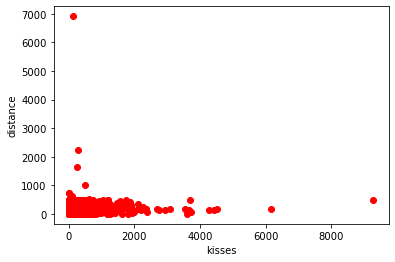

In [67]:
fig, ax = plt.subplots()

# Add data: "counts_kisses" on x-axis, "distance" on y-axis

x=cleaned[cleaned['isVip']==0]['counts_kisses']
y=cleaned[cleaned['isVip']==0]['distance']
ax.scatter(x,y,color='red')

# Set the x-axis label to "kisses"
ax.set_xlabel("kisses")
ax.set_ylabel("distance")
plt.show()


In [28]:
Q1=VIP.quantile(.25,axis=0)
Q3=VIP.quantile(.75,axis=0)
IQR=Q3-Q1
Lower_Limit=(Q1-1.5*IQR)
Upper_Limit=(Q3 + 1.5*IQR)
Outliers=VIP[(((VIP<Lower_Limit) | ((VIP) >Upper_Limit))).any(axis=1)]
print(len(Outliers))
print((len(VIP)-len(Outliers))/len(VIP))
len(VIP[VIP['isOnline']==1])

59
0.3516483516483517


41

Given that a new user joins, what is the probability that they will become a VIP?

In [26]:
91/3992

0.022795591182364728

There are 56 outliers in the VIP dataset. The age and picture distribution can be seen below.

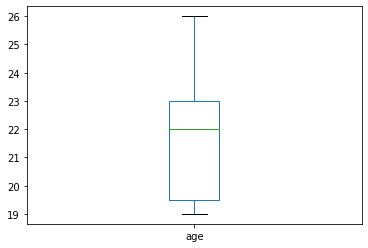

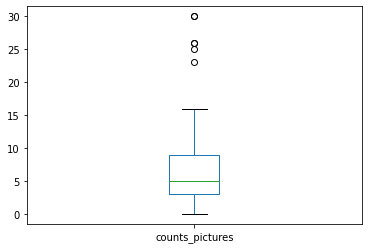

In [27]:
#No_Outliers=VIP[~(((VIP<Lower_Limit) | ((VIP) >Upper_Limit))).any(axis=1)]
VIP['age'].plot(kind='box')
plt.show()
VIP['counts_pictures'].plot(kind='box')
plt.show()

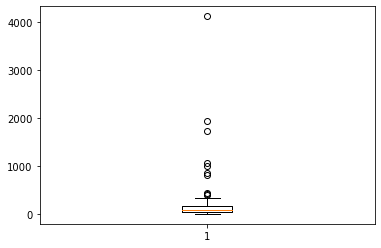

In [25]:
import matplotlib.pyplot as plt
VIP=df[df['isVip']==1]
fig,axis = plt.subplots()
axis.boxplot(VIP['counts_kisses'])
plt.show()

# Non-VIP

In [36]:
cleaned[cleaned['isVip']==0].describe()

,age,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,distance,isFlirtstar,isHighlighted,isInfluencer,isMobile,...,isOnline,isVip,lang_count,verified,shareProfileEnabled,lastOnlineTime,birthd,crypt,isSystemProfile,index1
count,3901.000000,3901.000000,3901.000000,3901.000000,3901.000000,3855.000000,3901.000000,3901.000000,3901.0,3901.000000,...,3901.000000,3901.0,3901.000000,3901.000000,3901.000000,3.900000e+03,3901.000000,46.0,2.0,3901.000000
mean,22.000769,4.735452,3676.669316,155.100231,2.332992,208.044384,0.011536,0.011536,0.0,0.744168,...,0.588567,0.0,1.106127,0.216098,0.961036,1.428897e+09,0.003845,1.0,1.0,2011.606511
std,1.955334,4.351156,6831.884617,373.640170,12.331307,182.768339,0.106796,0.106796,0.0,0.436384,...,0.492156,0.0,0.576031,0.411635,0.193535,8.140588e+05,0.061898,0.0,0.0,1153.306006
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,1.426592e+09,0.000000,1.0,1.0,0.000000
25%,20.000000,2.000000,375.000000,11.000000,0.000000,86.150000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,1.000000,0.000000,1.000000,1.428332e+09,0.000000,1.0,1.0,1013.000000
50%,22.000000,4.000000,1190.000000,43.000000,0.000000,173.000000,0.000000,0.000000,0.0,1.000000,...,1.000000,0.0,1.000000,0.000000,1.000000,1.428385e+09,0.000000,1.0,1.0,2023.000000
75%,24.000000,6.000000,4033.000000,140.000000,0.000000,319.000000,0.000000,0.000000,0.0,1.000000,...,1.000000,0.0,1.000000,0.000000,1.000000,1.429975e+09,0.000000,1.0,1.0,3011.000000
max,28.000000,30.000000,164425.000000,9288.000000,241.000000,6918.000000,1.000000,1.000000,0.0,1.000000,...,1.000000,0.0,9.000000,1.000000,1.000000,1.430647e+09,1.000000,1.0,1.0,3991.000000


If you are a VIP your page is Highlighted; thus getting more profile visits, likes, and fans

 # Correlation

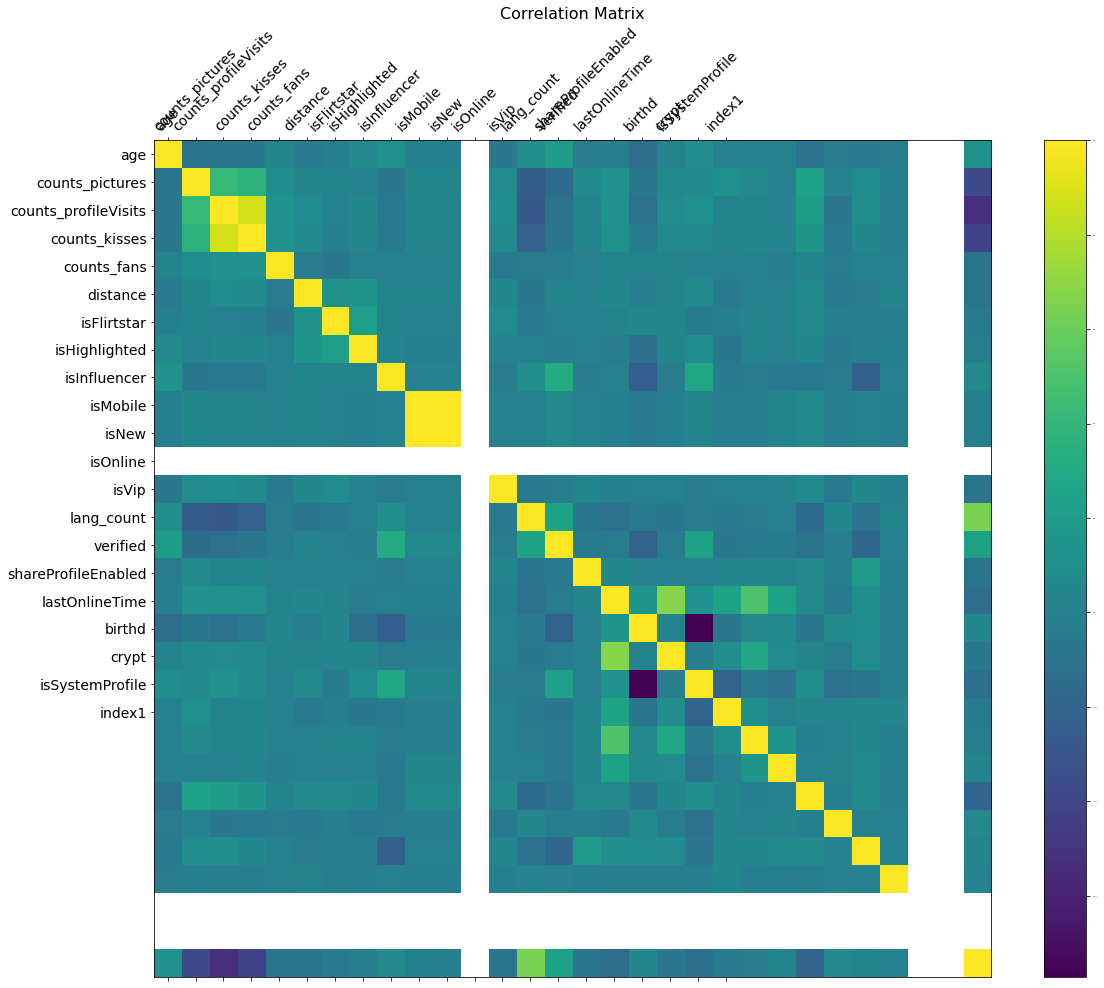

In [69]:
f = plt.figure(figsize=(19, 15))
plt.matshow(cleaned.corr(), fignum=f.number)
plt.xticks(range(cleaned.select_dtypes(['number']).shape[1]), cleaned.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(cleaned.select_dtypes(['number']).shape[1]), cleaned.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=2)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

# Insight

# A simulation of size 3,992 using the empirical distribution shows VIPs get more kisses

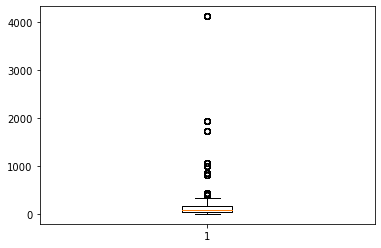

,0
count,3992.000000
mean,222.319389
std,525.858007
min,0.000000
25%,33.000000
50%,79.000000
75%,172.250000
max,4114.000000


In [30]:
import numpy as np

# Set the seed
np.random.seed(125)

empty=[]
kisses=np.array(cleaned[cleaned['isVip']==1]['counts_kisses'])
for i in range(3992):
    empty.append(kisses[int(np.random.rand()*len(kisses))])
fig,axis = plt.subplots()
axis.boxplot(empty)
plt.show()
pd.DataFrame(empty).describe()

# VIPs are highlighted more often resulting in more profile views

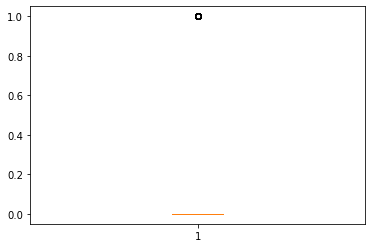

,0
count,3992.000000
mean,0.018036
std,0.133098
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [51]:
empty=[]
highlighted=np.array(cleaned[cleaned['isVip']==1]['isHighlighted'])
for i in range(3992):
    empty.append(highlighted[int(np.random.rand()*len(highlighted))])
fig,axis = plt.subplots()
axis.boxplot(empty)
plt.show()
pd.DataFrame(empty).describe()


In [52]:
cleaned[cleaned['isHighlighted']==1]['counts_profileVisits'].describe()

count       47.000000
mean      4873.468085
std       7682.757193
min         18.000000
25%        516.500000
50%       2071.000000
75%       5593.500000
max      44883.000000
Name: counts_profileVisits, dtype: float64

In [70]:
profile=cleaned[cleaned['isHighlighted']==1]
profile['isVip']
2/47 #4% of Highlighted members are VIPs 
89/3945 #2.25% of Non-Highlighted members are VIPs

0.02256020278833967

In [56]:
cleaned[cleaned['isHighlighted']==0]['counts_profileVisits'].describe()


count      3945.000000
mean       3691.551838
std        6834.327628
min           0.000000
25%         383.000000
50%        1220.000000
75%        4033.000000
max      164425.000000
Name: counts_profileVisits, dtype: float64

# New entrants

How many consecutive new users must purchase VIP to achieve desired 25% proportion and how many future users is this equivalent to?

In [37]:
#Characteristics of a VIP
#Age        #Pictures   
#21.593407	6.978022	4939.978022	220.879121	2.439560	172.730769	0.021978	0.021978	0.0	0.824176	0.021978	0.450549	1.0	1.263736	0.384615	0.945055	1.429940e+09	0.0	NaN	NaN


New users that have age below the 45th percentile, count of pictures above the 80th percentile, profile visits about the 79th percentile, and kisses above the 83rd percentile are expected to become VIP users

In [57]:
cleaned['age'].quantile(.45)
cleaned['counts_pictures'].quantile(.80)
cleaned['counts_profileVisits'].quantile(.78605)
cleaned['counts_kisses'].quantile(.83)


220.52999999999975

.45*(1-0.80)*(1-.78605)*(1-0.83)=0.327% #this is the VIP acquisition rate among current members according to above metric

(91+x)/(3992+x)=.25 --> x=1210 new users --> 1210/(.45(1-0.80)(1-.78605)(1-0.83) = 369642.287 future users

In [19]:
cleaned[cleaned['isNew']==1]['isVip'].describe()

count    953.000000
mean       0.002099
std        0.045787
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: isVip, dtype: float64

The VIP purchase rate can get as low as 0.21% with new users.